In [1]:
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from plot_moldyn import Plot_Inst_Data # Plotting

sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")
plt.style.use("seaborn-ticks")

# Molecular Dynamics (NVE)

We can generate future configurations of an N-particle system by solving Newton's equations, $F= m \, a$, with an integration algorithm. For this simulation we used the Verlet integrator, which calculates **accurate positions to the order of $dt^3$**. It is **not self-starting** because it requires two past configurations to generate the following configuration. We can fix this by providing the simulation with a valid 0th step.

$$ \vec{r}(t+dt) \simeq 2 \vec{r}(t) - \vec{r}(t-dt) + dt^2 \vec{a}$$

#### Lennard-Jones Potential

Our interaction potential is the Lennard-Jones potential.

In [2]:
def LJ(X, Reduced_Units=True):
    if Reduced_Units == True:
        return 4 * ((1 / X) ** 12 - (1 / X) ** 6)
    else:
        sigma = 3.4 * 10 ** (-10)  # m
        k_B = 1.380649 * 10 ** (-23)  # J/K
        epsilon = 120 * k_B  # J
        return 4 * epsilon(sigma / X) ** 12 - (sigma / X) ** 6

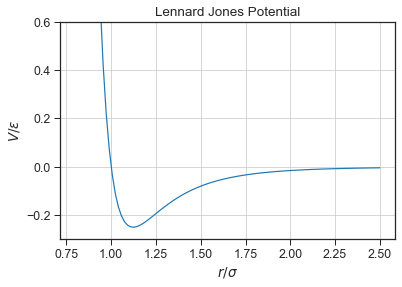

In [3]:
x = np.linspace(0.8, 2.5, 100)
lj = (1 / x) ** 12 - (1 / x) ** 6
plt.plot(x, lj)
plt.ylim(-0.3, 0.6)
plt.grid()
plt.title("Lennard Jones Potential")
plt.ylabel(r"$V/\epsilon$")
plt.xlabel(r"$r/\sigma$")
plt.show()

#### Lennard-Jones units to SI units?

Our simulation uses Lennard-Jones units. ($\sigma = \epsilon = m = 1$)

Therefore, to return to a physical system of interest (Argon), we need to perform some conversions.

In [4]:
sigma = 3.4 * 10 ** (-10)  # m
k_B = 1.380649 * 10 ** (-23)  # J/K
T = 120  # K
epsilon = T * k_B  # J
m = 39.948 * 1.66 * 10 ** (-27)  # mass of argon, kg
t = sigma * np.sqrt(m / epsilon)
p = epsilon / sigma ** 3  # Pa

print("Sigma :", sigma)
print("Epsilon :", epsilon)
print("Mass :", m)
print("Time :", t)
print("Temperature :", T)
print("Pressure :", format(p, "E"))

Sigma : 3.4e-10
Epsilon : 1.6567788e-21
Mass : 6.631367999999999e-26
Time : 2.151038666903973e-12
Temperature : 120
Pressure : 4.215293E+07


### Parameters

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Simulations performed with 1000 steps per block in 100 blocks.

### Simulation at a Glance (Lennard-Jones Units)



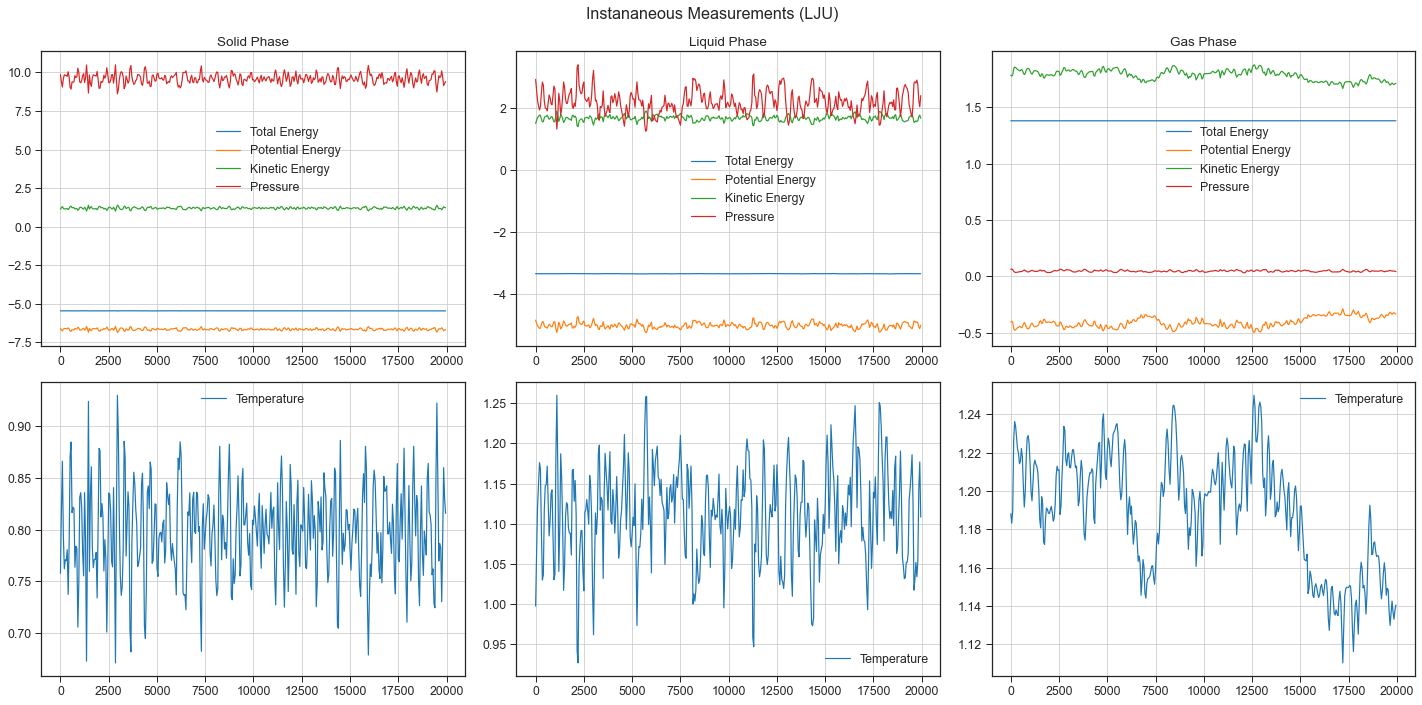

In [5]:
skip = 50 # For plotting speed
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
plt.suptitle("Instananeous Measurements (LJU)")

Plot_Inst_Data("./data/solid/output_etot.dat", label="Total Energy", skip=skip, axis=ax[0, 0])
Plot_Inst_Data("./data/solid/output_epot.dat", label="Potential Energy", skip=skip, axis=ax[0, 0])
Plot_Inst_Data("./data/solid/output_ekin.dat", label="Kinetic Energy", skip=skip, axis=ax[0, 0])
Plot_Inst_Data("./data/solid/output_press.dat", label="Pressure", skip=skip, axis=ax[0, 0])
ax[0, 0].legend(loc=(0.4, 0.5))
ax[0, 0].title.set_text("Solid Phase")

Plot_Inst_Data("./data/liquid/output_etot.dat", label="Total Energy", skip=skip, axis=ax[0, 1])
Plot_Inst_Data("./data/liquid/output_epot.dat", label="Potential Energy", skip=skip, axis=ax[0, 1])
Plot_Inst_Data("./data/liquid/output_ekin.dat", label="Kinetic Energy", skip=skip, axis=ax[0, 1])
Plot_Inst_Data("./data/liquid/output_press.dat", label="Pressure", skip=skip, axis=ax[0, 1])
ax[0, 1].legend(loc=(0.4, 0.4))
ax[0, 1].title.set_text("Liquid Phase")

Plot_Inst_Data("./data/Gas/output_etot.dat", label="Total Energy", skip=skip, axis=ax[0, 2])
Plot_Inst_Data("./data/Gas/output_epot.dat", label="Potential Energy", skip=skip, axis=ax[0, 2])
Plot_Inst_Data("./data/Gas/output_ekin.dat", label="Kinetic Energy", skip=skip, axis=ax[0, 2])
Plot_Inst_Data("./data/Gas/output_press.dat", label="Pressure", skip=skip, axis=ax[0, 2])
ax[0, 2].legend(loc=(0.4, 0.5))
ax[0, 2].title.set_text("Gas Phase")

Plot_Inst_Data("./data/solid/output_temp.dat", label="Temperature", skip=skip, axis=ax[1, 0])
Plot_Inst_Data("./data/liquid/output_temp.dat", label="Temperature", skip=skip, axis=ax[1, 1])
Plot_Inst_Data("./data/gas/output_temp.dat", label="Temperature", skip=skip, axis=ax[1, 2])

plt.tight_layout()

**Figure: Instantaneous measurements of each observable in Lennard-Jones units.**

## Blocked Averages of Observable Quantities (SI units)

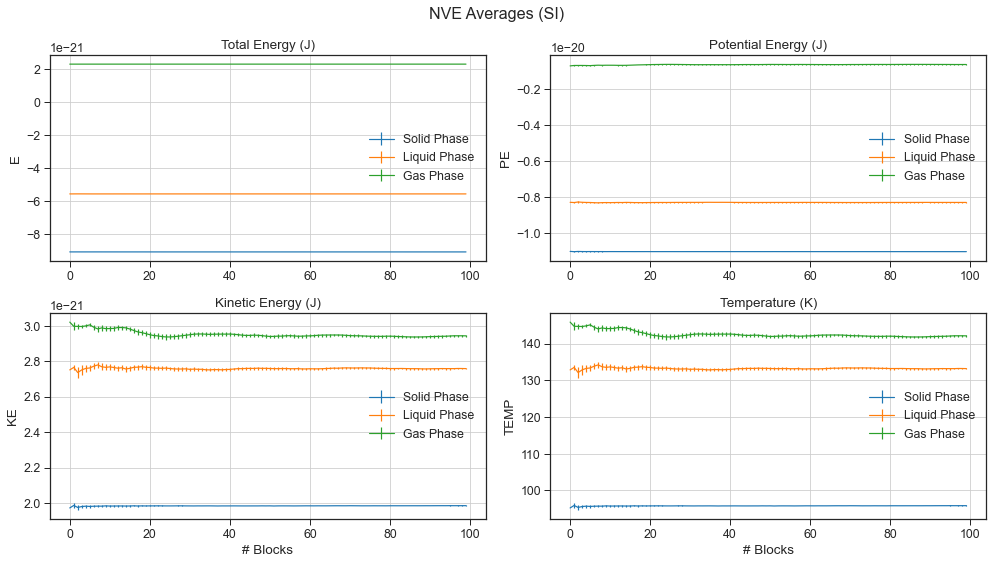

In [8]:
# Blocked Averages
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("NVE Averages (SI)")

N = 100  # Blocks
x = np.arange(N)

# SOLID PHASE

datafile = "./data/solid/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Solid Phase")

datafile = "./data/solid/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Solid Phase")

datafile = "./data/solid/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Solid Phase")

datafile = "./data/solid/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(x, avg * T, yerr=err * T, label="Solid Phase")

# LIQUID PHASE

datafile = "./data/liquid/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Liquid Phase")

datafile = "./data/liquid/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Liquid Phase")

datafile = "./data/liquid/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Liquid Phase")

datafile = "./data/liquid/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(x, avg * T, yerr=err * T, label="Liquid Phase")

# GAS PHASE

datafile = "./data/gas/output.ave_etot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Gas Phase")

datafile = "./data/gas/output.ave_epot.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[0, 1].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Gas Phase")

datafile = "./data/gas/output.ave_ekin.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 0].errorbar(x, avg * epsilon, yerr=err * epsilon, label="Gas Phase")

datafile = "./data/gas/output.ave_temp.dat"
avg, err = np.loadtxt(datafile, usecols=(1, 2), delimiter=" ", unpack="true")
ax[1, 1].errorbar(x, avg * T, yerr=err * T, label="Gas Phase")

# Formatting

ax[0, 0].title.set_text("Total Energy (J)")
ax[0, 0].set_ylabel("E")
ax[0, 0].grid()
ax[0, 0].legend()

ax[0, 1].title.set_text("Potential Energy (J)")
ax[0, 1].set_ylabel("PE")
ax[0, 1].grid()
ax[0, 1].legend()

ax[1, 0].title.set_text("Kinetic Energy (J)")
ax[1, 0].grid()
ax[1, 0].legend()
ax[1, 0].set_ylabel("KE")
ax[1, 0].set_xlabel("# Blocks")

ax[1, 1].title.set_text("Temperature (K)")
ax[1, 1].grid()
ax[1, 1].legend()
ax[1, 1].set_ylabel("TEMP")
ax[1, 1].set_xlabel("# Blocks")

plt.tight_layout()
plt.show()

**Figure: Blocked averages in SI units.**

## Pressure

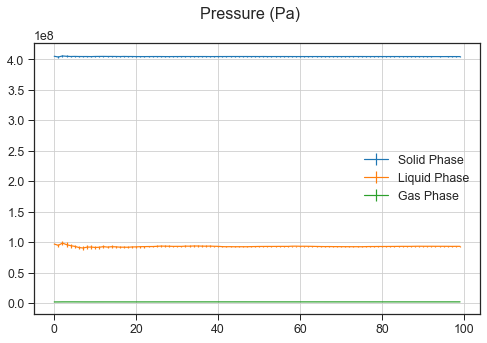

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("Pressure (Pa)")

N = 100  # Blocks
x = np.arange(N)

avg, err = np.loadtxt("./data/solid/output.ave_pres.dat", usecols=(1, 2), delimiter=" ", unpack="true")
ax.errorbar(x, avg * p, yerr=err * p, label="Solid Phase")

avg, err = np.loadtxt("./data/liquid/output.ave_pres.dat", usecols=(1, 2), delimiter=" ", unpack="true")
ax.errorbar(x, avg * p, yerr=err * p, label="Liquid Phase")

avg, err = np.loadtxt("./data/gas/output.ave_pres.dat", usecols=(1, 2), delimiter=" ", unpack="true")
ax.errorbar(x, avg * p, yerr=err * p, label="Gas Phase")

plt.grid()
plt.legend()
plt.show()

## Pairwise Distribution

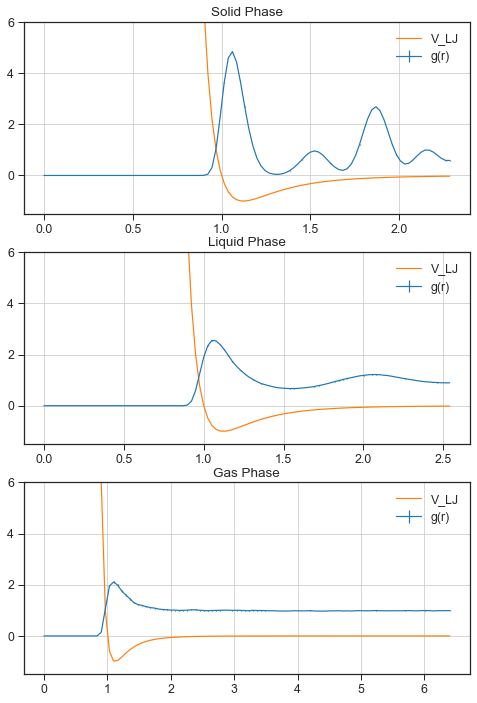

In [10]:
fig, ax = plt.subplots(3, figsize=(8, 12))

pos, G, Gerr = np.loadtxt("./data/solid/output.gave.dat", usecols=(1, 2, 3), unpack=True)

ax[0].errorbar(pos, G, yerr=Gerr, label="g(r)")
sns.lineplot(x=pos[1:], y=LJ(pos[1:]), ax=ax[0], label="V_LJ")
ax[0].set_ylim(-1.5, 6)
ax[0].title.set_text("Solid Phase")
ax[0].grid()

pos, G, Gerr = np.loadtxt("./data/liquid/output.gave.dat", usecols=(1, 2, 3), unpack=True)

ax[1].errorbar(pos, G, yerr=Gerr, label="g(r)")
sns.lineplot(x=pos[1:], y=LJ(pos[1:]), ax=ax[1], label="V_LJ")
ax[1].set_ylim(-1.5, 6)
ax[1].title.set_text("Liquid Phase")
ax[1].grid()

pos, G, Gerr = np.loadtxt("./data/gas/output.gave.dat", usecols=(1, 2, 3), unpack=True)

ax[2].errorbar(pos, G, yerr=Gerr, label="g(r)")
sns.lineplot(x=pos[1:], y=LJ(pos[1:]), ax=ax[2], label="V_LJ")
ax[2].set_ylim(-1.5, 6)
ax[2].title.set_text("Gas Phase")
ax[2].grid()